This program is predict IRA for north of Lima that wrote on February 25, 2022 by Odon Sanchez

In [1]:
!pip install shap

In [2]:
from google.colab import drive
import os
import sys
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:

df = pd.read_csv('/content/drive/MyDrive/RF.Regresion/Base.datos.Lima.csv',  sep=';')
print(df.head(10))

         date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  CDM.PM25  SJL.PM25  \
0   1/01/2015      NaN          NaN       NaN        NaN      18.2      39.9   
1   2/01/2015      NaN          NaN       NaN        NaN       6.8      16.8   
2   3/01/2015      NaN          NaN       NaN        NaN      11.1      18.9   
3   4/01/2015      NaN          NaN       NaN        NaN      13.8      21.3   
4   5/01/2015   2046.0       1682.0    2696.0     2157.0      17.4      26.1   
5   6/01/2015   2046.0       1682.0    2696.0     2157.0      17.1      27.5   
6   7/01/2015   2046.0       1682.0    2696.0     2157.0       3.8      25.2   
7   8/01/2015   2046.0       1682.0    2696.0     2157.0      10.9      23.8   
8   9/01/2015   2046.0       1682.0    2696.0     2157.0      17.3      21.8   
9  10/01/2015   2046.0       1682.0    2696.0     2157.0      22.5      21.9   

   CDM.PM10  STA.PM10  VMT.PM10  ...  RHMAX  RHMIN  Vel  VelMin  VelMax   u  \
0      43.1      71.6     117.6  ...    

In [5]:
# Replace 'S/D' with 'NaN'
df = df.replace(' ', 'NaN')
print(df.head(5))

        date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  CDM.PM25  SJL.PM25  \
0  1/01/2015      NaN          NaN       NaN        NaN      18.2      39.9   
1  2/01/2015      NaN          NaN       NaN        NaN       6.8      16.8   
2  3/01/2015      NaN          NaN       NaN        NaN      11.1      18.9   
3  4/01/2015      NaN          NaN       NaN        NaN      13.8      21.3   
4  5/01/2015   2046.0       1682.0    2696.0     2157.0      17.4      26.1   

   CDM.PM10  STA.PM10  VMT.PM10  ...  RHMAX  RHMIN  Vel  VelMin  VelMax   u  \
0      43.1      71.6     117.6  ...     88     76  NaN     NaN     NaN NaN   
1      27.9      50.6     110.2  ...     91     63  NaN     NaN     NaN NaN   
2      35.2      73.8     126.1  ...     90     68  NaN     NaN     NaN NaN   
3      25.4      67.0     111.3  ...     90     68  NaN     NaN     NaN NaN   
4      33.1      72.8     114.8  ...     86     69  NaN     NaN     NaN NaN   

    v     HI  Min.HI  Max.HI  
0 NaN  20.72    18.

In [6]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

print(df.head(10))

        date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  CDM.PM25  SJL.PM25  \
0 2015-01-01      NaN          NaN       NaN        NaN      18.2      39.9   
1 2015-01-02      NaN          NaN       NaN        NaN       6.8      16.8   
2 2015-01-03      NaN          NaN       NaN        NaN      11.1      18.9   
3 2015-01-04      NaN          NaN       NaN        NaN      13.8      21.3   
4 2015-01-05   2046.0       1682.0    2696.0     2157.0      17.4      26.1   
5 2015-01-06   2046.0       1682.0    2696.0     2157.0      17.1      27.5   
6 2015-01-07   2046.0       1682.0    2696.0     2157.0       3.8      25.2   
7 2015-01-08   2046.0       1682.0    2696.0     2157.0      10.9      23.8   
8 2015-01-09   2046.0       1682.0    2696.0     2157.0      17.3      21.8   
9 2015-01-10   2046.0       1682.0    2696.0     2157.0      22.5      21.9   

   CDM.PM10  STA.PM10  VMT.PM10  ...  RHMAX  RHMIN  Vel  VelMin  VelMax   u  \
0      43.1      71.6     117.6  ...     88     76 

In [7]:
df['IRA.Sul'] = pd.to_numeric(df['IRA.Sul'], errors='coerce')
df['IRA.Central'] = pd.to_numeric(df['IRA.Central'], errors='coerce')
df['IRA.Norte'] = pd.to_numeric(df['IRA.Norte'], errors='coerce')
df['IRA.Este'] = pd.to_numeric(df['IRA.Este'], errors='coerce')
df['CDM.PM25'] = pd.to_numeric(df['CDM.PM25'], errors='coerce')
df['SJL.PM25'] = pd.to_numeric(df['SJL.PM25'], errors='coerce')
df['CDM.PM10'] = pd.to_numeric(df['CDM.PM10'], errors='coerce')
df['STA.PM10'] = pd.to_numeric(df['STA.PM10'], errors='coerce')
df['VMT.PM10'] = pd.to_numeric(df['VMT.PM10'], errors='coerce')
df['CRB.PM10'] = pd.to_numeric(df['CRB.PM10'], errors='coerce')
df['TEM'] = pd.to_numeric(df['TEM'], errors='coerce')
df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')
df['RH'] = pd.to_numeric(df['RH'], errors='coerce')
df['RHMAX'] = pd.to_numeric(df['RHMAX'], errors='coerce')
df['RHMIN'] = pd.to_numeric(df['RHMIN'], errors='coerce')
df['Vel'] = pd.to_numeric(df['Vel'], errors='coerce')
df['VelMin'] = pd.to_numeric(df['VelMin'], errors='coerce')
df['VelMax'] = pd.to_numeric(df['VelMax'], errors='coerce')
df['u'] = pd.to_numeric(df['u'], errors='coerce')
df['v'] = pd.to_numeric(df['v'], errors='coerce')
df['HI'] = pd.to_numeric(df['HI'], errors='coerce')
df['Min.HI'] = pd.to_numeric(df['Min.HI'], errors='coerce')
df['Max.HI'] = pd.to_numeric(df['Max.HI'], errors='coerce')

In [8]:
print(df.dtypes)

date           datetime64[ns]
IRA.Sul               float64
IRA.Central           float64
IRA.Este              float64
IRA.Norte             float64
CDM.PM25              float64
SJL.PM25              float64
CDM.PM10              float64
STA.PM10              float64
VMT.PM10              float64
CRB.PM10              float64
TEM                   float64
TMAX                  float64
TMIN                  float64
RH                      int64
RHMAX                   int64
RHMIN                   int64
Vel                   float64
VelMin                float64
VelMax                float64
u                     float64
v                     float64
HI                    float64
Min.HI                float64
Max.HI                float64
dtype: object


In [9]:
# Drop rows with NaN values
df1 = df.dropna()
print(df1.head(10))

          date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  CDM.PM25  SJL.PM25  \
184 2015-07-04   2662.0       2134.0    3307.0     2880.0      18.7      33.0   
185 2015-07-05   2662.0       2134.0    3307.0     2880.0      16.4      21.8   
186 2015-07-06   2461.0       2263.0    3446.0     2732.0      11.6      20.9   
187 2015-07-07   2461.0       2263.0    3446.0     2732.0      12.2      20.0   
188 2015-07-08   2461.0       2263.0    3446.0     2732.0      16.4      26.2   
189 2015-07-09   2461.0       2263.0    3446.0     2732.0      21.4      37.1   
190 2015-07-10   2461.0       2263.0    3446.0     2732.0      23.3      40.4   
191 2015-07-11   2461.0       2263.0    3446.0     2732.0      19.3      36.8   
192 2015-07-12   2461.0       2263.0    3446.0     2732.0      19.0      30.0   
193 2015-07-13   2526.0       2069.0    3230.0     2678.0      17.3      29.4   

     CDM.PM10  STA.PM10  VMT.PM10  ...  RHMAX  RHMIN   Vel  VelMin  VelMax  \
184      43.8      48.0      6

In [10]:
df1['Tamplitude'] = df1['TMAX'] - df1['TMIN']
print(df1.head(5))


          date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  CDM.PM25  SJL.PM25  \
184 2015-07-04   2662.0       2134.0    3307.0     2880.0      18.7      33.0   
185 2015-07-05   2662.0       2134.0    3307.0     2880.0      16.4      21.8   
186 2015-07-06   2461.0       2263.0    3446.0     2732.0      11.6      20.9   
187 2015-07-07   2461.0       2263.0    3446.0     2732.0      12.2      20.0   
188 2015-07-08   2461.0       2263.0    3446.0     2732.0      16.4      26.2   

     CDM.PM10  STA.PM10  VMT.PM10  ...  RHMIN   Vel  VelMin  VelMax     u  \
184      43.8      48.0      62.5  ...     78  0.99     0.4     1.7  0.71   
185      41.0      39.7      55.1  ...     76  1.04     0.1     2.4  0.92   
186      37.7      33.6      43.1  ...     81  0.87     0.2     1.9  0.84   
187      52.0      33.1      60.8  ...     80  0.57     0.1     1.3  0.49   
188      53.7      45.0      65.9  ...     68  0.57     0.1     1.0  0.51   

        v     HI  Min.HI  Max.HI  Tamplitude  
184

<ipython-input-10-afc93d298f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tamplitude'] = df1['TMAX'] - df1['TMIN']


In [11]:
# Extract year, month, and day
df1['Year'] = df1['date'].dt.year
df1['Month'] = df1['date'].dt.month
df1['Day'] = df1['date'].dt.day
print(df1.head(10))

          date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  CDM.PM25  SJL.PM25  \
184 2015-07-04   2662.0       2134.0    3307.0     2880.0      18.7      33.0   
185 2015-07-05   2662.0       2134.0    3307.0     2880.0      16.4      21.8   
186 2015-07-06   2461.0       2263.0    3446.0     2732.0      11.6      20.9   
187 2015-07-07   2461.0       2263.0    3446.0     2732.0      12.2      20.0   
188 2015-07-08   2461.0       2263.0    3446.0     2732.0      16.4      26.2   
189 2015-07-09   2461.0       2263.0    3446.0     2732.0      21.4      37.1   
190 2015-07-10   2461.0       2263.0    3446.0     2732.0      23.3      40.4   
191 2015-07-11   2461.0       2263.0    3446.0     2732.0      19.3      36.8   
192 2015-07-12   2461.0       2263.0    3446.0     2732.0      19.0      30.0   
193 2015-07-13   2526.0       2069.0    3230.0     2678.0      17.3      29.4   

     CDM.PM10  STA.PM10  VMT.PM10  ...  VelMax     u     v     HI  Min.HI  \
184      43.8      48.0      62

<ipython-input-11-fff57caac2e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['date'].dt.year
<ipython-input-11-fff57caac2e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['date'].dt.month
<ipython-input-11-fff57caac2e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [12]:
df2 = df1.iloc[:, 5:26]
IRA = df1.iloc[:, 1:5]
date1 = df1.iloc[:, 0]
time1 = df1.iloc[:, 26:29]
print(df2.head(10))
print(IRA.head(10))
print(date1.head(10))
print(time1.head(10))

     CDM.PM25  SJL.PM25  CDM.PM10  STA.PM10  VMT.PM10  CRB.PM10   TEM  TMAX  \
184      18.7      33.0      43.8      48.0      62.5      74.5  18.7  20.4   
185      16.4      21.8      41.0      39.7      55.1      67.8  19.1  21.4   
186      11.6      20.9      37.7      33.6      43.1      45.9  18.5  20.0   
187      12.2      20.0      52.0      33.1      60.8      58.3  18.0  18.7   
188      16.4      26.2      53.7      45.0      65.9      69.6  18.5  20.1   
189      21.4      37.1      57.5      59.0      48.5      80.7  18.4  20.6   
190      23.3      40.4      60.7      61.5      37.6      92.9  18.3  20.2   
191      19.3      36.8      52.2      59.9      48.5      90.8  18.2  20.0   
192      19.0      30.0      44.2      46.3      56.9      87.5  18.0  19.8   
193      17.3      29.4      43.2      46.3      57.5      69.3  17.9  19.6   

     TMIN  RH  ...  RHMIN   Vel  VelMin  VelMax     u     v     HI  Min.HI  \
184  17.7  86  ...     78  0.99     0.4    1.70  0.7

In [13]:
IRA['IRAmetro'] = IRA['IRA.Sul'] + IRA['IRA.Central'] + IRA['IRA.Este'] + IRA['IRA.Norte']
print(IRA.head(10))

     IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  IRAmetro
184   2662.0       2134.0    3307.0     2880.0   10983.0
185   2662.0       2134.0    3307.0     2880.0   10983.0
186   2461.0       2263.0    3446.0     2732.0   10902.0
187   2461.0       2263.0    3446.0     2732.0   10902.0
188   2461.0       2263.0    3446.0     2732.0   10902.0
189   2461.0       2263.0    3446.0     2732.0   10902.0
190   2461.0       2263.0    3446.0     2732.0   10902.0
191   2461.0       2263.0    3446.0     2732.0   10902.0
192   2461.0       2263.0    3446.0     2732.0   10902.0
193   2526.0       2069.0    3230.0     2678.0   10503.0


In [14]:
for col in df2.columns:
    df2[f'{col}_lag1'] = df2[col].shift(1)
    df2[f'{col}_lag2'] = df2[col].shift(2)
    df2[f'{col}_lag3'] = df2[col].shift(3)
    df2[f'{col}_lag4'] = df2[col].shift(4)
    df2[f'{col}_lag5'] = df2[col].shift(5)
    df2[f'{col}_lag6'] = df2[col].shift(6)
    df2[f'{col}_lag7'] = df2[col].shift(7)


print(df2.head(10))


     CDM.PM25  SJL.PM25  CDM.PM10  STA.PM10  VMT.PM10  CRB.PM10   TEM  TMAX  \
184      18.7      33.0      43.8      48.0      62.5      74.5  18.7  20.4   
185      16.4      21.8      41.0      39.7      55.1      67.8  19.1  21.4   
186      11.6      20.9      37.7      33.6      43.1      45.9  18.5  20.0   
187      12.2      20.0      52.0      33.1      60.8      58.3  18.0  18.7   
188      16.4      26.2      53.7      45.0      65.9      69.6  18.5  20.1   
189      21.4      37.1      57.5      59.0      48.5      80.7  18.4  20.6   
190      23.3      40.4      60.7      61.5      37.6      92.9  18.3  20.2   
191      19.3      36.8      52.2      59.9      48.5      90.8  18.2  20.0   
192      19.0      30.0      44.2      46.3      56.9      87.5  18.0  19.8   
193      17.3      29.4      43.2      46.3      57.5      69.3  17.9  19.6   

     TMIN  RH  ...  Max.HI_lag5  Max.HI_lag6  Max.HI_lag7  Tamplitude_lag1  \
184  17.7  86  ...          NaN          NaN        

<ipython-input-14-97897a035be2>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col}_lag3'] = df2[col].shift(3)
<ipython-input-14-97897a035be2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col}_lag4'] = df2[col].shift(4)
<ipython-input-14-97897a035be2>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

In [15]:
df2.to_csv('variables.Leag.csv', index=False)
print(df2.head(10))

     CDM.PM25  SJL.PM25  CDM.PM10  STA.PM10  VMT.PM10  CRB.PM10   TEM  TMAX  \
184      18.7      33.0      43.8      48.0      62.5      74.5  18.7  20.4   
185      16.4      21.8      41.0      39.7      55.1      67.8  19.1  21.4   
186      11.6      20.9      37.7      33.6      43.1      45.9  18.5  20.0   
187      12.2      20.0      52.0      33.1      60.8      58.3  18.0  18.7   
188      16.4      26.2      53.7      45.0      65.9      69.6  18.5  20.1   
189      21.4      37.1      57.5      59.0      48.5      80.7  18.4  20.6   
190      23.3      40.4      60.7      61.5      37.6      92.9  18.3  20.2   
191      19.3      36.8      52.2      59.9      48.5      90.8  18.2  20.0   
192      19.0      30.0      44.2      46.3      56.9      87.5  18.0  19.8   
193      17.3      29.4      43.2      46.3      57.5      69.3  17.9  19.6   

     TMIN  RH  ...  Max.HI_lag5  Max.HI_lag6  Max.HI_lag7  Tamplitude_lag1  \
184  17.7  86  ...          NaN          NaN        

In [16]:
#here join all Ira with all lag columns with 2711 rows
# Concatenate IRA and df2 along the columns (axis=1)
# IRA has 4 columns and df2 has 168 columns
df3 = pd.concat([date1, IRA, df2, time1], axis=1)

# Display the new DataFrame df3
print(df3)


           date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  IRAmetro  \
184  2015-07-04   2662.0       2134.0    3307.0     2880.0   10983.0   
185  2015-07-05   2662.0       2134.0    3307.0     2880.0   10983.0   
186  2015-07-06   2461.0       2263.0    3446.0     2732.0   10902.0   
187  2015-07-07   2461.0       2263.0    3446.0     2732.0   10902.0   
188  2015-07-08   2461.0       2263.0    3446.0     2732.0   10902.0   
...         ...      ...          ...       ...        ...       ...   
2917 2022-12-27   1574.0        820.0    1557.0     1125.0    5076.0   
2918 2022-12-28   1574.0        820.0    1557.0     1125.0    5076.0   
2919 2022-12-29   1574.0        820.0    1557.0     1125.0    5076.0   
2920 2022-12-30   1574.0        820.0    1557.0     1125.0    5076.0   
2921 2022-12-31   1574.0        820.0    1557.0     1125.0    5076.0   

      CDM.PM25  SJL.PM25  CDM.PM10  STA.PM10  ...  Tamplitude_lag1  \
184       18.7      33.0      43.8      48.0  ...              Na

In [17]:
# Drop rows with NaN values
df4 = df3.dropna()
print(df4.head(10))
df4.to_csv('All.Variales.Data.csv', index=False)

          date  IRA.Sul  IRA.Central  IRA.Este  IRA.Norte  IRAmetro  CDM.PM25  \
191 2015-07-11   2461.0       2263.0    3446.0     2732.0   10902.0      19.3   
192 2015-07-12   2461.0       2263.0    3446.0     2732.0   10902.0      19.0   
193 2015-07-13   2526.0       2069.0    3230.0     2678.0   10503.0      17.3   
194 2015-07-14   2526.0       2069.0    3230.0     2678.0   10503.0      11.7   
195 2015-07-15   2526.0       2069.0    3230.0     2678.0   10503.0      17.1   
196 2015-07-16   2526.0       2069.0    3230.0     2678.0   10503.0      17.0   
197 2015-07-17   2526.0       2069.0    3230.0     2678.0   10503.0      14.7   
198 2015-07-18   2526.0       2069.0    3230.0     2678.0   10503.0      12.8   
199 2015-07-19   2526.0       2069.0    3230.0     2678.0   10503.0      12.1   
200 2015-07-20   2154.0       1300.0    2859.0     2083.0    8396.0      16.9   

     SJL.PM25  CDM.PM10  STA.PM10  ...  Tamplitude_lag1  Tamplitude_lag2  \
191      36.8      52.2      59.

In [ ]:
X = df4.drop(['date', 'IRA.Norte', 'IRA.Sul', 'IRA.Central', 'IRA.Este', 'IRAmetro', 'Year', 'Month', 'Day'], axis=1)
y = df4['IRAmetro']
print(X.head(5))


     CDM.PM25  SJL.PM25  CDM.PM10  STA.PM10  VMT.PM10  CRB.PM10   TEM  TMAX  \
191      19.3      36.8      52.2      59.9      48.5      90.8  18.2  20.0   
192      19.0      30.0      44.2      46.3      56.9      87.5  18.0  19.8   
193      17.3      29.4      43.2      46.3      57.5      69.3  17.9  19.6   
194      11.7      17.4      39.0      30.3      53.7      46.9  17.3  18.3   
195      17.1      31.3      56.2      53.2      35.9      77.6  17.8  18.9   

     TMIN  RH  ...  Max.HI_lag5  Max.HI_lag6  Max.HI_lag7  Tamplitude_lag1  \
191  17.1  79  ...         20.9         22.5         21.7              2.7   
192  16.8  82  ...         21.1         20.9         22.5              2.9   
193  16.4  84  ...         23.5         21.1         20.9              3.0   
194  16.0  86  ...         23.9         23.5         21.1              3.2   
195  17.2  82  ...         23.2         23.9         23.5              2.3   

     Tamplitude_lag2  Tamplitude_lag3  Tamplitude_lag4  

In [ ]:
print(y)

191     10902.0
192     10902.0
193     10503.0
194     10503.0
195     10503.0
         ...   
2917     5076.0
2918     5076.0
2919     5076.0
2920     5076.0
2921     5076.0
Name: IRAmetro, Length: 2704, dtype: float64


In [ ]:
#Model development (setup train and test dataset using 80/20 split()). Then we setup our model
#using RandomForestRegressor funtion; n_estimators is numer of trees we want to create
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check for NaN values
if x_train.isnull().values.any() or y_train.isnull().values.any():
    x_train = x_train.dropna()
    y_train = y_train[x_train.index]  # Align y_train with x_train

if x_test.isnull().values.any() or y_test.isnull().values.any():
    x_test = x_test.dropna()
    y_test = y_test[x_test.index]  # Align y_test with x_test

h = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit the model again
h.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = h.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted IRA'])
y_pred.to_csv('y_pred.csv', index=False)
print(y_pred)


     Predicted IRA
0          7252.23
1          9649.80
2          4855.45
3           901.77
4          7170.07
..             ...
536       10450.16
537        9118.85
538       10663.10
539       12782.43
540       10464.44

[541 rows x 1 columns]


In [ ]:
print(x_test)

      CDM.PM25  SJL.PM25  CDM.PM10  STA.PM10  VMT.PM10  CRB.PM10   TEM  TMAX  \
1137      13.9      16.1      31.1      75.1     217.8      43.9  22.6  25.5   
673       13.7      31.9      47.6      98.2     144.2     117.2  18.0  21.0   
2654      13.3      30.2      16.8      37.7      25.4      19.0  19.5  23.0   
1999      29.2      22.7      37.8      28.5      65.0      57.2  16.4  18.9   
950       11.8      27.6      42.2      51.1     122.3      55.5  16.6  19.1   
...        ...       ...       ...       ...       ...       ...   ...   ...   
874        9.3      18.4      28.0      32.6     157.3      43.3  19.1  20.1   
2448      15.2      44.9      58.1     164.4      75.4      86.9  14.7  16.0   
639       12.3      53.2      28.4      63.8      76.0      68.1  17.7  20.7   
1393      26.1      47.6      37.1      69.6     217.4     111.4  17.9  21.0   
1408      15.2      31.2      23.3      74.4     134.5      99.9  19.5  22.6   

      TMIN  RH  ...  Max.HI_lag5  Max.H

In [ ]:
print(y_test)

1137     7474.0
673     10633.0
2654     5331.0
1999      611.0
950      9222.0
         ...   
874     11549.0
2448     2410.0
639     12228.0
1393    10397.0
1408    10140.0
Name: IRAmetro, Length: 541, dtype: float64


In [ ]:
r2_score(y_test,y_pred)

0.46650385290041196

In [ ]:
mean_squared_error(y_test,y_pred)

15440880.877993345

In [ ]:
mean_absolute_error(y_test,y_pred)

2607.9177818853973

In [ ]:
root_mean_squared_error(y_test,y_pred)

3929.488628052427

In [ ]:
features = pd.DataFrame(h.feature_importances_, index = x_train.columns) # Use x_train.columns instead of X.columns
features.columns = ['Importance']
features = features.sort_values(by = 'Importance', ascending = False)
print(features)

               Importance
STA.PM10_lag7    0.043290
STA.PM10         0.041799
STA.PM10_lag3    0.029736
STA.PM10_lag5    0.027370
HI_lag1          0.022391
...                   ...
RHMAX_lag3       0.001183
RHMAX            0.000975
RHMAX_lag5       0.000971
RHMAX_lag2       0.000958
RHMAX_lag1       0.000883

[168 rows x 1 columns]


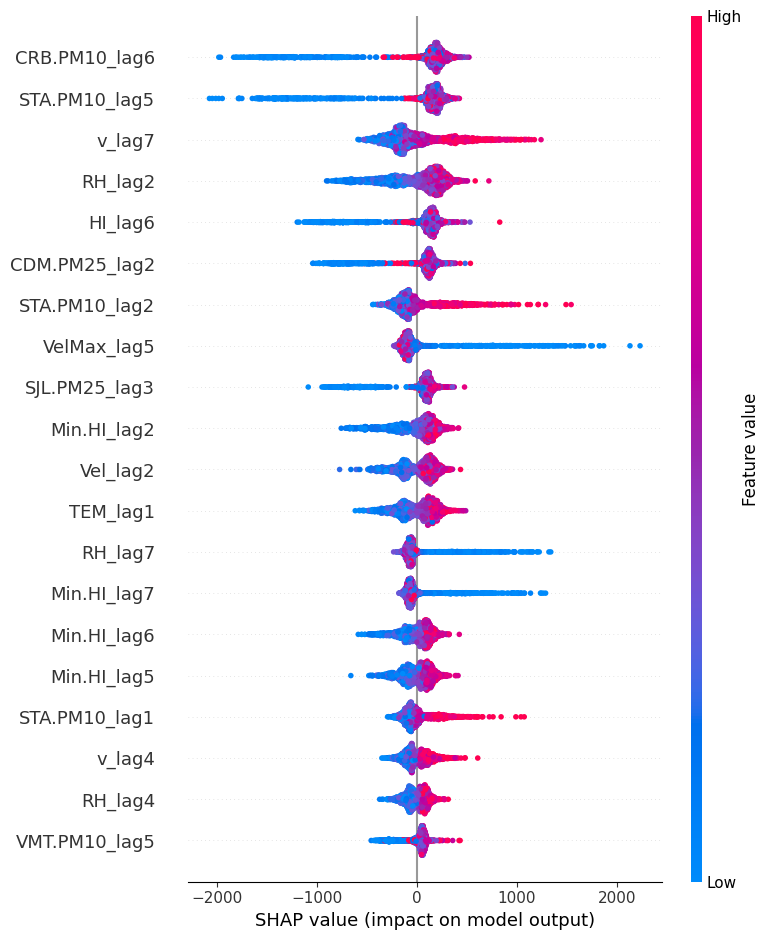

In [ ]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(h)
# Calculate SHAP values
shap_values = explainer.shap_values(x_train)

# Plot SHAP summary
shap.summary_plot(shap_values, x_train, features.index)

In [ ]:
# Save the figure in TIFF format
plt.savefig('shap_metropolitana.png', format='png')

# Optionally, you can also display the plot
plt.show()

<Figure size 640x480 with 0 Axes>

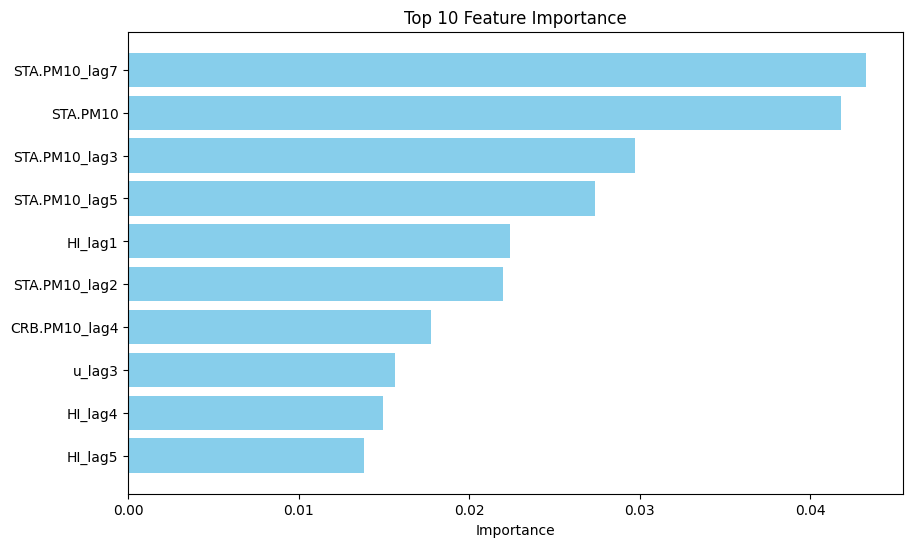

In [ ]:
import matplotlib.pyplot as plt

# Sort features by 'Importance' and select the top 10
top_features = features.sort_values(by='Importance', ascending=False).head(10)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()